# Electric Vehicles Market Size Analysis. 

## Importing Libraries : 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset : 

In [2]:
ev_data = pd.read_csv('C:/Users/asifi/Desktop/Data_Analysis_Projects/Electric_Vehicle_Population_Data.csv')

In [3]:
ev_data.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


### So this data is based on the EV population in United States. 

## Data Cleaning :

#### Gathering information about the attributes(columns) in the dataset -

In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

#### Checking for the null values - 

In [5]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

##### There are some data missing from the dataset, so we have to deal with the missing values.

#### Dropping the null values from the dataset - 

In [6]:
ev_data = ev_data.dropna()

##### EV Adoption Over Time: Analyze the growth of the EV population by model year.
##### Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
##### EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
##### Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
##### Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
##### Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles. 

## Analysis: 

### EV Adoptation Over Time : 

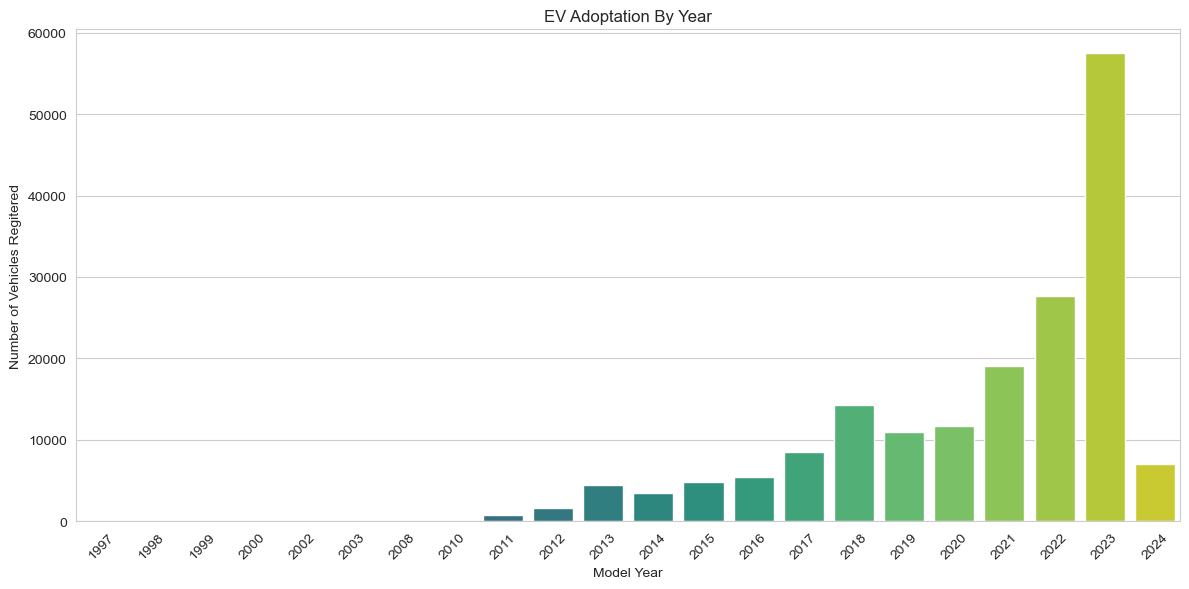

In [7]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
ev_adoptation_by_year = ev_data['Model Year'].value_counts().sort_index()

sns.barplot(x= ev_adoptation_by_year.index, y= ev_adoptation_by_year.values, palette='viridis')

plt.title('EV Adoptation By Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Regitered')

plt.xticks(rotation = 45)
plt.tight_layout()


plt.show()

##### Insight : Upward trend is observed in vehicles registration, modest increase is seen from 2017. However in 2023 a sharp increase can be seen in EV vehicle registration .

### Geographical Distribution :
#### selection top 3 counties based on EV registration and then visualizing the distribution of the EVs within the cities of those counties.

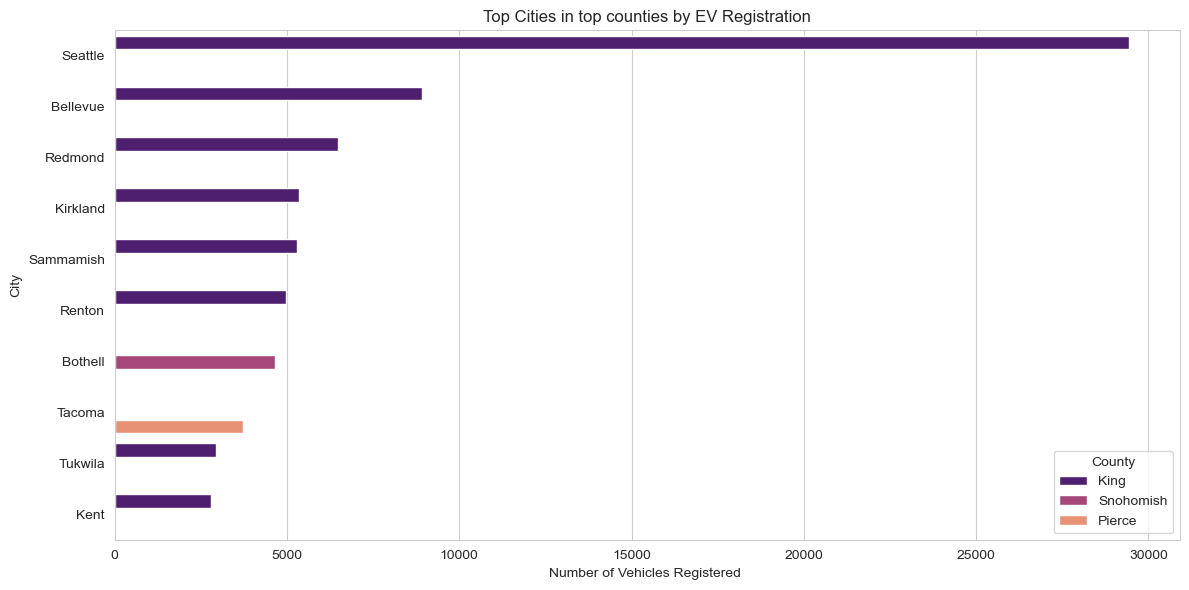

In [8]:
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

#Filtering the dataset for these top counties.
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# Analyzing the distribution of EVs within the cities of theses top counties.
ev_city_distribution_top_counties = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Top 10 cities across these counties 
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x= 'Number of Vehicles',y= 'City', hue= 'County', data = top_cities, palette='magma')
plt.title('Top Cities in top counties by EV Registration')
plt.xlabel('Number of Vehicles Registered ')
plt.ylabel('City')
plt.legend(title = 'County')
plt.tight_layout()
plt.show()

##### Insight : Top 3 counties in terms of EV registration were King, Snohomish and Pierce. The above bar graph shows that the most number of Ev registration took place in the King County. The city 'Seattle' from the king county show the most number of registration which is considerably higher than the city 'Bellevue' and 'Redmond' of King County as well. 'Bothell' in Snohomish and 'Tacoma' in Pierce shows the highest EV registration in that county respectively. 
##### Overall : Graph indicates that the EV adoptation is not uniform across the cities and mostly concentrated in certain areas, particulary in King County.

### EV Types: 

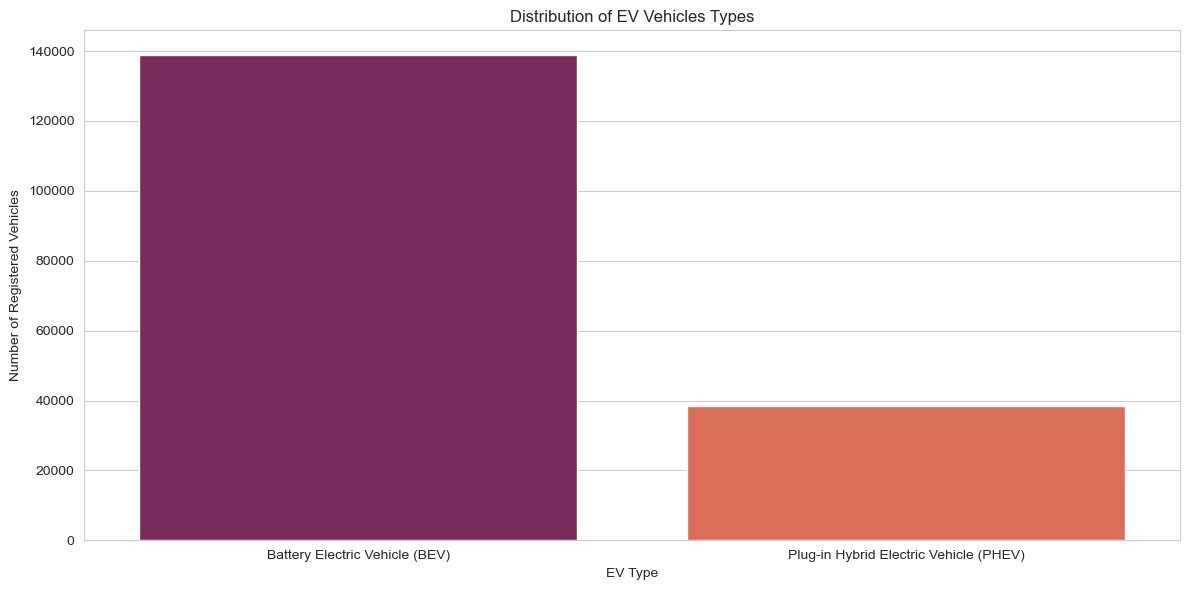

In [9]:
# Distribution of EV Vehicles Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=ev_type_distribution.index, y= ev_type_distribution.values, palette='rocket')
plt.title('Distribution of EV Vehicles Types')
plt.xlabel('EV Type')
plt.ylabel('Number of Registered Vehicles')
plt.tight_layout()
plt.show()

##### Battery Electric Vehicles (BEV) are more popular or preferred over Plug-in Hybrid Electric Vehicles(PHEV) among the EV registration in US.


### Make and Model Popularity :

#### Top 10 EV Manufacturers : 

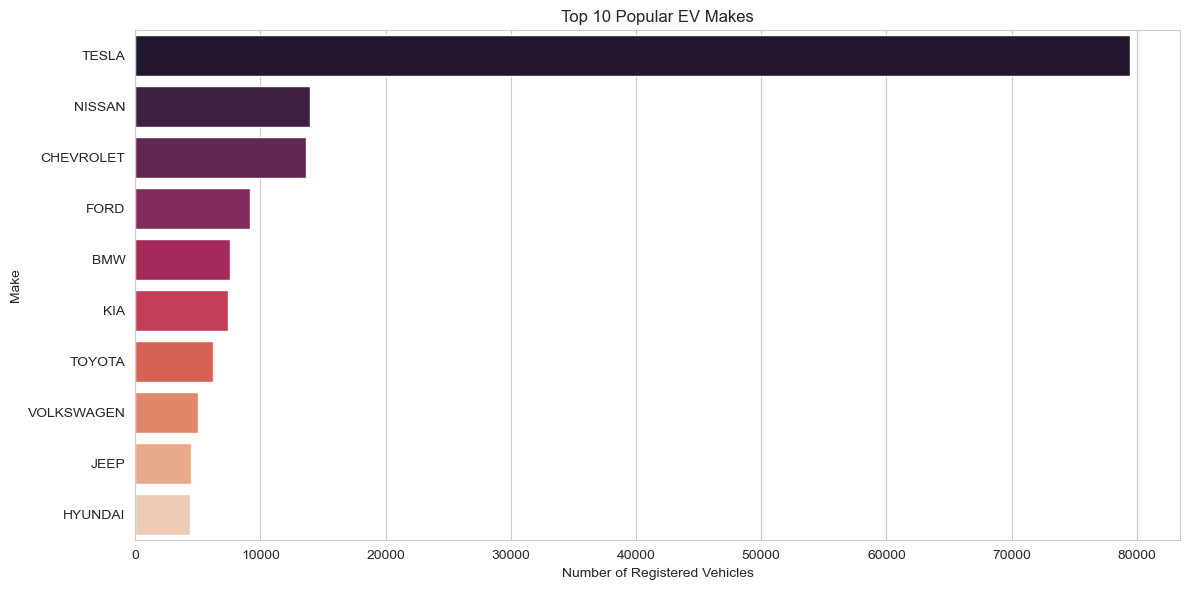

In [10]:
ev_make_distribution = ev_data['Make'].value_counts().head(10) # Limiting to top 10

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y= ev_make_distribution.index, palette='rocket')
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Registered Vehicles')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

##### Insights : TESLA being the most popular EV Make leading by a substantial margin with the highest number of EV Registered. NISSAN is the second most popular manufacturer followed by CHEVROLET, both having significantly fewer registration than TESLA. 

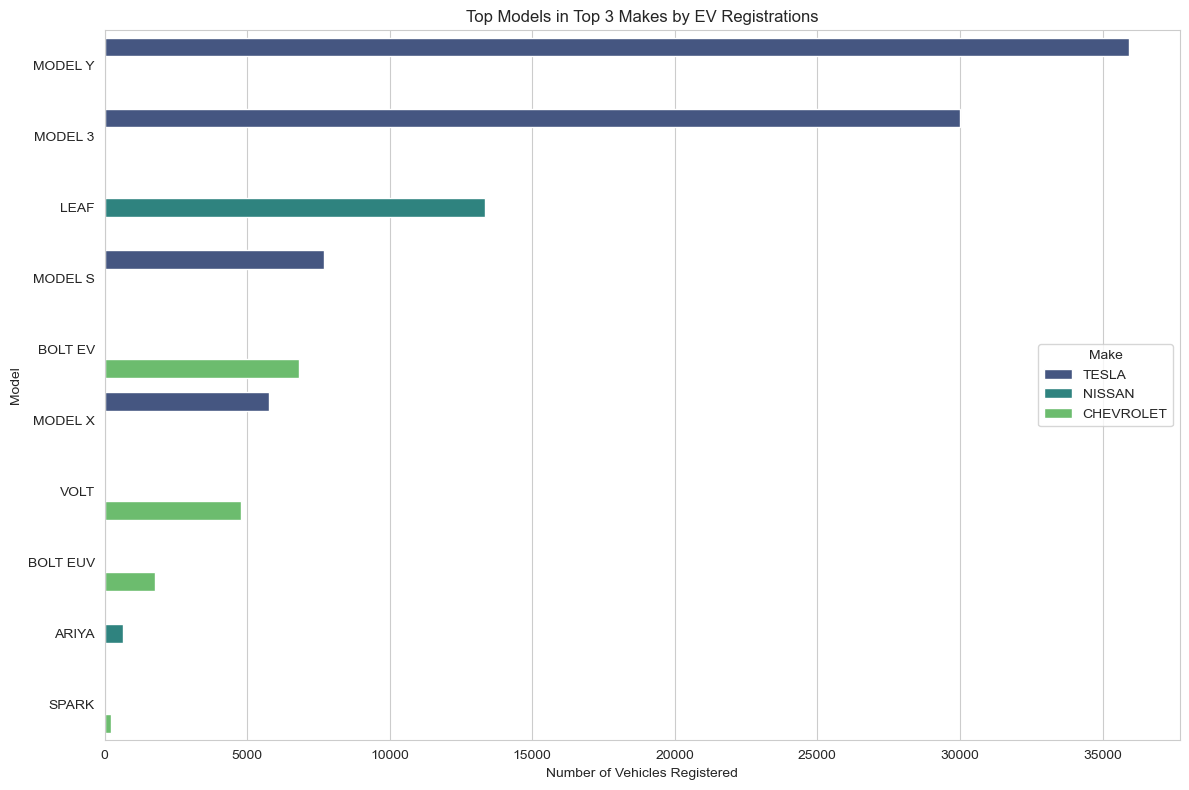

In [11]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

##### Insights : TESLA's MODEL Y and MODEL 3 are the most registered vehicles,with MODEL Y having the highest number of registrations. NISSAN's LEAF is the third highest number of registrations.

### Electrivc Range: 

#### Distribution of Electric Range - 

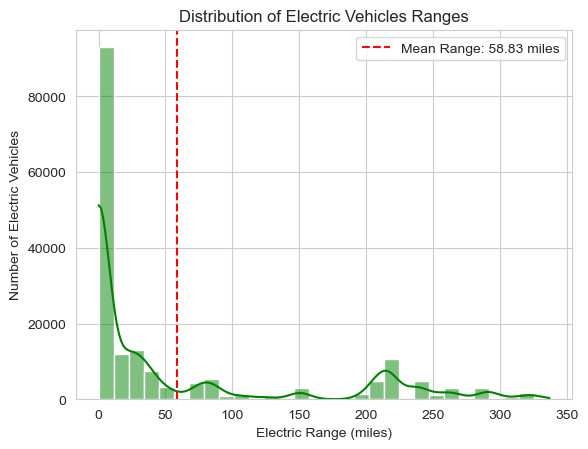

In [12]:
plt.Figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'], bins= 30, kde= True , color='green')
plt.title("Distribution of Electric Vehicles Ranges")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Number of Electric Vehicles")
plt.axvline(ev_data['Electric Range'].mean(), color = 'Red', linestyle = "--", label = f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

##### Mean Electric Range is 58.83 miles. In this set of data there are significantly more number of vehicles with less electric ranges, so the data  is skwed to the left.  

#### Distribution of Electric Range by Model Year - 

In [13]:
average_range_by_year = ev_data.groupby('Model Year')["Electric Range"].mean().reset_index()

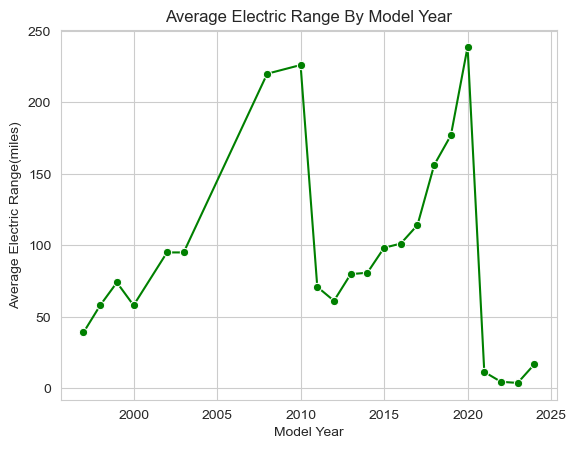

In [14]:
plt.Figure(figsize=(12,6))
sns.lineplot(x='Model Year', y = 'Electric Range', data = average_range_by_year, marker='o', color= 'green')
plt.title("Average Electric Range By Model Year")
plt.ylabel("Average Electric Range(miles)")
plt.grid(True)
plt.show()

##### General Upward Trend in the Graph. Highest peak reaching in the year 2020. A sharp decline is seen after 2020, which may be due to incomplete data or introduction of several low range model of EV. But kind of improving in past 2 years. 

#### Distribution of Electric Range by Model Manufacture -

In [15]:
average_range_by_model =top_makes_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending = False).reset_index()

top_range_model = average_range_by_model.head(10)

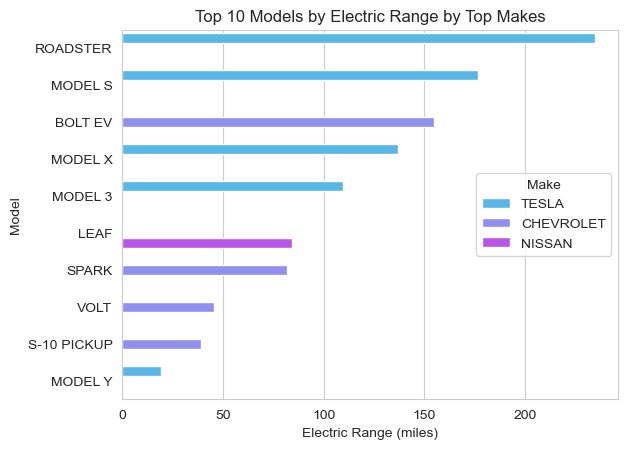

In [16]:
plt.Figure(figsize=(12,6))
sns.barplot(x = 'Electric Range', y = 'Model', hue= 'Make', data = top_range_model, palette='cool')
plt.title("Top 10 Models by Electric Range by Top Makes")
plt.xlabel("Electric Range (miles)")
plt.legend(title= 'Make', loc = 'center right')
plt.show()

##### TESLA models have the highest ranges, ROADSTER of TESLA having the highest electric range. BOLT of CHEVROLET performes the best for the CHEVROLET in terms of Electric Range. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.  

## Estimated Market Size Analysis Of EV in US : 

### Count of EV registration per year - 

In [17]:
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

##### Number of EV registration is extracted per year from 1997 to 2024. There is a significant growth in from 2018 compared to previous years. A noticeable jump can be seen from 27,708 EVs in 2022 to 57,519 EVs registration in year 2023, which marked the highest registration in the given data.
##### In 2024, currently, there are only 7072 EVs registration , which suggest the partial data.

#### To forecast the total number of EV registrations expected in 2024, we can use growth based approach from pervious complete years.  

### Calculating the Compound Annual Growth Rate (CAGR) to project the 2024 figures. Thereby estimating the market size for the next Five Years. 

In [20]:
from scipy.optimize import curve_fit

# Filter the data which includes years with complete data, assuming 2023 is the last complete year.
filtered_year = ev_registration_counts[ev_registration_counts.index<2024]

# Defining a function for exponential growth to fit the data.
def exp_growth(x, a, b):
    return a * np.exp( b * x)

# Prepare the data for curve fitting.
x_data = filtered_year.index - filtered_year.index.min()
y_data = filtered_year.values

# fitting the data to the exponential growth function 
params, covariance = curve_fit(exp_growth, x_data, y_data)

# Using the fitted function to forecast the number of EVs for 2024 and the next five years.
forecaste_year = np.arange(2024, 2024 + 6) - filtered_year.index.min()
forecaste_value = exp_growth(forecaste_year, *params)

# Creating a dictionary to display the forecasted values for the ease of interpretation.
forecasted_evs = dict (zip(forecaste_year + filtered_year.index.min(), forecaste_value))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


#### Plotting the Estimated market size data : 

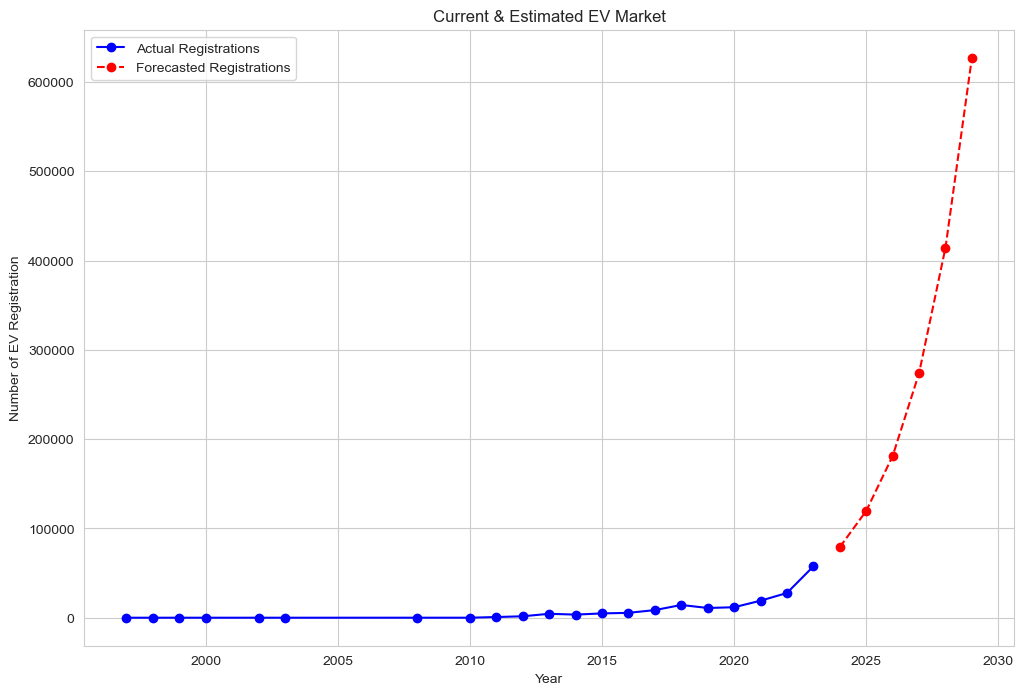

In [21]:
# Prepare data for plotting.
years = np.arange(filtered_year.index.min(), 2029 + 1)
actual_years = filtered_year.index
forecaste_year_full = np.arange(2024, 2029 + 1)

# Actual and the Forecasted values.
actual_values = filtered_year.values
forecaste_values_full = [forecasted_evs[year] for year in forecaste_year_full]

# Plotting the Graph.
plt.figure(figsize=(12,8))
plt.plot(actual_years, actual_values, 'bo-', label = 'Actual Registrations')
plt.plot(forecaste_year_full, forecaste_values_full, 'ro--', label = 'Forecasted Registrations')

plt.title("Current & Estimated EV Market")
plt.xlabel('Year')
plt.ylabel('Number of EV Registration')
plt.legend()
plt.grid(True)

plt.show()

#### The number of actual  EV registrations remained relatively low and stable until 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV purchases.
#### The forecasted EV registrations  predicts an extreme increase in EV registrations, Expected to have a sharp rise in upcoming years

##  Conclusion : 

### EV market size is expected to expand considerably. The increase in the EV registrations in the forecasted data suggests that the consumer adoptation of EVs  is on the rise, and this trend is likely to continue.
### Overall, A promising Future for the EV industry, indicating a shift in consumer preferences to EV Vehicles and a potential increase in the related investment and buisness opportunities.

# THANK YOU.